<a href="https://colab.research.google.com/github/Tazoria/TIL/blob/main/data_analysis/basic/02_DafaFrame_%ED%86%B5%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
# 한글깨짐방지(실행 후 런타임 다시시작)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 💕 통계

## 1️⃣ pivot_table- values
- index
- comlumns
- aggfunc
  - default = mean

In [51]:
df = pd.DataFrame({"item": ["shirts", "shirts", "shirts", "shirts", "shirts",
                          "pants", "pants", "pants", "pants"],
                    "color": ["white", "white", "white", "black", "black",
                          "white", "white", "black", "black"],
                   "size": ["small", "large", "large", "small",
                          "small", "large", "small", "small",
                         "large"],
                   "sale": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "inventory": [2, 4, 5, 5, 6, 6, 8, 9, 9]})

In [52]:
# 집계분석 item, size별 재고 합계를 pivot_table 메소드로 분석
# 재고, pants와 shirt lagrge samll
df.pivot_table(index='item', columns='size', values='inventory', aggfunc='sum')

size,large,small
item,,
pants,15,17
shirts,9,13


In [53]:
df.pivot_table(index=['item', 'color'], columns='size', values='inventory', aggfunc='sum', fill_value=0)

size          large  small
item   color              
pants  black      9      9
       white      6      8
shirts black      0     11
       white      9      2

In [54]:
df.pivot_table(index='item', columns='size', values=['inventory', 'sale'], aggfunc='sum')

inventory        sale      
size       large small large small
item                              
pants         15    17    11    11
shirts         9    13     4     7

### ✅ 예제 : pivot_table - titanic

In [55]:
df_titanic = sns.load_dataset('titanic')
df_titanic = df_titanic[['survived', 'pclass', 'sex', 'age', 'embarked']]
df_titanic.dropna(inplace=True)
df_titanic.head()

,survived,pclass,sex,age,embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S


In [56]:
# 성별, 객실등급별 승선자수 - count 사용, margin=True
df_titanic.pivot_table(index='sex', columns='pclass', values='survived', aggfunc='count', margins=True)

pclass,1,2,3,All
sex,,,,
female,83,74,102,259
male,101,99,253,453
All,184,173,355,712


In [57]:
# 성별, 객실등급별 생존자수
df_titanic.pivot_table(index='sex', columns='pclass', values='survived', aggfunc='sum', margins=True)

pclass,1,2,3,All
sex,,,,
female,80,68,47,195
male,40,15,38,93
All,120,83,85,288


In [58]:
# 성별, 객실등급별 생존률 - aggfunc를 입력하지 않아도 됨(default:mean)
df_titanic.pivot_table(index='sex', columns='pclass', values='survived', margins=True).round(2)

pclass,1,2,3,All
sex,,,,
female,0.96,0.92,0.46,0.75
male,0.40,0.15,0.15,0.21
All,0.65,0.48,0.24,0.40


### ✅ 예제 : pivot_table - tips

In [59]:
'''
[ tips.csv ]
total_bill: 총 계산요금
tip: 팁
sex: 성별
smoker: 흡연 여부
day: 요일
time: 식사 시간
size: 식사 인원
'''

tips = sns.load_dataset('tips')
tips.info()
tips.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [60]:
tips['tip_pct'] = round((tips.tip/tips.total_bill)*100, 2)
tips.pivot_table('tip_pct', 'sex')

,tip_pct
sex,
Male,15.764713
Female,16.648276


In [61]:
tips.pivot_table('tip_pct', 'sex','smoker', aggfunc='count', margins=True, margins_name='계')

smoker,Yes,No,계
sex,,,
Male,60,97,157
Female,33,54,87
계,93,151,244


In [62]:
tips.pivot_table('tip_pct', ['sex', 'smoker'])

tip_pct
sex    smoker           
Male   Yes     15.276667
       No      16.066598
Female Yes     18.214545
       No      15.691111

In [63]:
tips.pivot_table('tip_pct', 'sex', 'smoker') # 위와 같은 의미

smoker,Yes,No
sex,,
Male,15.276667,16.066598
Female,18.214545,15.691111


In [64]:
tips.pivot_table('tip_pct', 'smoker', aggfunc=['mean', 'max', 'min'])

,mean,max,min
,tip_pct,tip_pct,tip_pct
smoker,,,
Yes,16.319140,71.03,3.56
No,15.932318,29.20,5.68


## 2️⃣ groupby
- df.groupby(그룹기준컬럼).통계적용컬럼.통계함수
- 메소드
  - .count() : 누락값을 제외한 데이터 수
  - .size() : 누락값을 포함한 데이터 수
  - 기타 : .mean(), .sum(), .std(), .min(), .max()

### ✅ 예제 : groupby - titanic

#### 🔘 seaborn의 titanic.csv

In [65]:
df_titanic1 = df_titanic.groupby('pclass').survived.count().to_frame()
df_titanic1

,survived
pclass,
1,184
2,173
3,355


In [66]:
# 객실등급(pclass)별 생존자수 결과 집계
df_titanic2 = df_titanic.groupby('pclass').survived.sum().to_frame()
df_titanic2

,survived
pclass,
1,120
2,83
3,85


In [67]:
# 객실등급(pclass) 별 생존비율 결과 집계
df_titanic3 = df_titanic.groupby('pclass').survived.mean().to_frame()
df_titanic3

,survived
pclass,
1,0.652174
2,0.479769
3,0.239437


In [68]:
df_titanic4 = pd.concat([df_titanic1,df_titanic2,df_titanic3], axis=1)
df_titanic4.columns = ['승선자수', '생존자수', '생존비율']
df_titanic4.index.name = '등급'
df_titanic4

,승선자수,생존자수,생존비율
등급,,,
1,184,120,0.652174
2,173,83,0.479769
3,355,85,0.239437


#### 🔘 다른 titanic.csv

In [69]:

titanic = pd.read_csv('/content/drive/MyDrive/class/판다스실습/titanic.csv')
df = titanic.copy()
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Embarked']]
df.dropna(inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1306
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1044 non-null   int64  
 1   Pclass    1044 non-null   int64  
 2   Sex       1044 non-null   object 
 3   Age       1044 non-null   float64
 4   Embarked  1044 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 48.9+ KB


,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S


In [70]:
# 성별 생존통계
df5 = df.groupby('Sex').Survived.count().to_frame()
df5

,Survived
Sex,
female,386
male,658


In [71]:
# 성별 생존자수
df6 = df.groupby('Sex').Survived.sum().to_frame()
df6

,Survived
Sex,
female,322
male,93


In [72]:
# 성별 생존률
df7 = df.groupby('Sex').Survived.mean().to_frame()
df7

,Survived
Sex,
female,0.834197
male,0.141337


In [73]:
# 성별 탑승자수, 생존자수, 생존률
df8 = pd.concat([df5, df6, df7], axis=1)
df8.columns = ['승선자수', '생존자수', '생존비율']
df8

,승선자수,생존자수,생존비율
Sex,,,
female,386,322,0.834197
male,658,93,0.141337


In [74]:
# 성별, 객실등급별 생존률
df.groupby(['Sex', 'Pclass']).Survived.mean().to_frame()

Survived
Sex    Pclass          
female 1       0.977099
       2       0.941748
       3       0.638158
male   1       0.264901
       2       0.094937
       3       0.108883

##### 💡 agg
- agg ( 사용자정의함수 , 매개변수 )

In [75]:
# 내가 만든(사용자정의) 함수 적용 .agg(사용자정의함수, 매개변수)
# 사용자함수 선언
def my_mean(values):
  return sum(values) / len(values)

In [76]:
df.groupby(['Sex', 'Pclass']).Survived.agg(my_mean)

Sex     Pclass
female  1         0.977099
        2         0.941748
        3         0.638158
male    1         0.264901
        2         0.094937
        3         0.108883
Name: Survived, dtype: float64

## ✅ 예제 : 서울시 코로나19 확진자 현황.csv
- 서울 열린데이터 광장

In [77]:
covid_seoul = pd.read_csv('/content/drive/MyDrive/class/dataset/서울시 코로나19 확진자 현황.csv', low_memory=False)
df = covid_seoul.copy()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      99550 non-null  int64  
 1   확진일     99550 non-null  object 
 2   환자번호    0 non-null      float64
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      99550 non-null  object 
 6   여행력     1717 non-null   object 
 7   접촉력     99550 non-null  object 
 8   조치사항    0 non-null      float64
 9   상태      99550 non-null  object 
 10  이동경로    10000 non-null  object 
 11  등록일     99550 non-null  object 
 12  수정일     99550 non-null  object 
 13  노출여부    99550 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 10.6+ MB


,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,99550,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
1,99549,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
2,99548,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
3,99547,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
4,99546,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y


In [78]:
# 데이터 확인 및 전처리

# 불필요한 컬럼 삭제
df = df.drop(columns=['환자번호', '국적', '환자정보', '조치사항', '이동경로', '등록일', '수정일', '노출여부'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      99550 non-null  int64 
 1   확진일     99550 non-null  object
 2   지역      99550 non-null  object
 3   여행력     1717 non-null   object
 4   접촉력     99550 non-null  object
 5   상태      99550 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


In [79]:
# 데이터 타입 변경
# '확진일': object -> datetime
df['확진일'] = pd.to_datetime(df['확진일'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      99550 non-null  int64         
 1   확진일     99550 non-null  datetime64[ns]
 2   지역      99550 non-null  object        
 3   여행력     1717 non-null   object        
 4   접촉력     99550 non-null  object        
 5   상태      99550 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.6+ MB


### 💡 nunique
- 유니크원소의 갯수세기
- len( unique( ) ) = nunique( )

In [80]:
# '지역'(서울의 지역구는 총 25개!) : 서울 지역구 25개 + 타도시 + 기타 = 27개가 되어야함
print(df['지역'].nunique()) # nunique()
print(df['지역'].unique())

29
['기타' '영등포구' '관악구' '서대문구' '송파구' '동대문구' '성동구' '중랑구' '타시도' '종로구' '도봉구' '용산구'
 '마포구' '구로구' '동작구' '강동구' '중구' '노원구' '양천구' '강서구' '은평구' '성북구' '광진구' '금천구'
 '강북구' '강남구' '서초구' '타시도 ' ' 성북구']


In [81]:
df['지역'] = df['지역'].str.strip()
df['지역'].nunique()

27

In [82]:
# 분석하기 쉽게 '지역'컬럼을 카테고리형으로 형변환
df['지역'] = df['지역'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      99550 non-null  int64         
 1   확진일     99550 non-null  datetime64[ns]
 2   지역      99550 non-null  category      
 3   여행력     1717 non-null   object        
 4   접촉력     99550 non-null  object        
 5   상태      99550 non-null  object        
dtypes: category(1), datetime64[ns](1), int64(1), object(3)
memory usage: 3.9+ MB


In [83]:
# 결측치 확인
df.isnull().sum()

연번         0
확진일        0
지역         0
여행력    97833
접촉력        0
상태         0
dtype: int64

## 

In [84]:
# 확진일-구별로 pivot_table 집계

In [85]:
# df_gu = pd.pivot_table(df, '연번', '확진일', '지역', 'count', margins=True)
df_gu = df.pivot_table(values='연번', index='확진일', columns='지역', aggfunc='count', margins=True)
df_gu.head()

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,All
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24 00:00:00,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-30 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,3
2020-01-31 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,3
2020-02-02 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2020-02-05 00:00:00,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2


In [86]:
# 서울시 일별 추가 확진자 동향
s_date = df_gu['All'][:-1]
s_date

확진일
2020-01-24       1
2020-01-30       3
2020-01-31       3
2020-02-02       1
2020-02-05       2
              ... 
2021-09-24    1222
2021-09-25     928
2021-09-26     778
2021-09-27     842
2021-09-28    1054
Name: All, Length: 582, dtype: int64

In [87]:
# 서울시 일별 추가 확진자 많은 순으로 정렬
s_date.sort_values(ascending=False)

확진일
2021-09-24    1222
2021-09-28    1054
2021-09-25     928
2021-09-23     905
2021-09-27     842
              ... 
2020-04-24       1
2020-04-30       1
2020-05-01       1
2020-05-17       1
2020-01-24       1
Name: All, Length: 582, dtype: int64

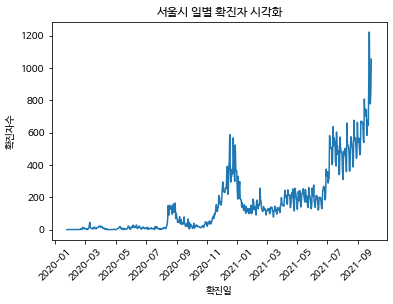

In [88]:
# 서울시 일별 추가 확진자 시각화
x = s_date.index
y = s_date.values
plt.plot(x, y)
plt.title('서울시 일별 확진자 시각화')
plt.xlabel('확진일')
plt.ylabel('확진자수')
plt.xticks(rotation=45)
plt.show()

In [89]:
# 서울시 구별 누적 확진자 비교
s_gu = df_gu.loc['All'][:-1]
s_gu = s_gu.sort_values(ascending=False)
s_gu

지역
강남구     6926
송파구     6356
관악구     5418
타시도     4715
영등포구    4463
강서구     4447
은평구     4284
서초구     4284
구로구     4168
동작구     4120
노원구     3932
강동구     3782
성북구     3779
중랑구     3729
마포구     3726
동대문구    3487
광진구     3486
양천구     3291
성동구     2839
용산구     2705
서대문구    2692
강북구     2606
도봉구     2605
기타      2321
금천구     2064
중구      1708
종로구     1617
Name: All, dtype: int64

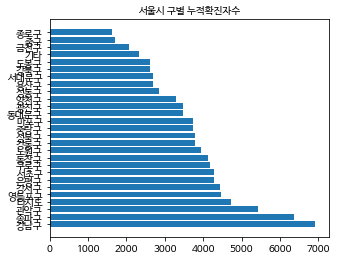

In [90]:
# 서울시 구별 누적확진자 많은 순 시각화
x = s_gu.index
y = s_gu.values
plt.figure(figsize=(5, 4))
plt.barh(x, y)
plt.title('서울시 구별 누적확진자수', size=10)
plt.show()

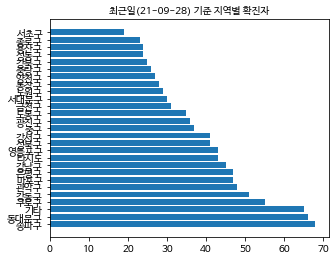

In [91]:
# 최근일(21-09-28) 기준 지역별 확진자
s_gu2 = df_gu.iloc[-2, :-1].sort_values(ascending=False)
x = s_gu2.index
y = s_gu2.values
plt.figure(figsize=(5, 4))
plt.barh(x, y)
plt.title('최근일(21-09-28) 기준 지역별 확진자', size=10)
plt.show()

In [92]:
# 접촉력에 따른 확진분석
df['접촉력'].unique()

array(['감염경로 조사중', '기타 확진자 접촉', '송파구 소재 시장 관련(?21.9.)', ..., '은평성모병원',
       '명성교회', '종로구 집단발병'], dtype=object)

In [93]:
# 접촉력에 따른 확진 건수 best 10
df['접촉력'].value_counts()[:10].to_frame()

,접촉력
기타 확진자 접촉,37943
감염경로 조사중,31964
타시도 확진자 접촉,4244
해외유입,1729
동부구치소 관련,1175
병원 및 요양시설,988
송파구 소재 시장 관련(?21.9.),659
성북구 사랑제일교회 관련,641
중구 소재 시장 관련(?21.9.),277
강서구 교회 관련,246


### 💡 datetime
- dt.year
- dt.month
- dt.day
- dt.hour
- dt.minute
- dt.second
- dt.dayofweek
- dt.day_name()

In [94]:
# 최근 월(9월) 접촉력에 따른 확진건수 best10
import datetime
df_sep_2021 = df[(df['확진일'].dt.year==2021) & (df['확진일'].dt.month==9)]['접촉력'].value_counts()[:10].to_frame
df_sep_2021

<bound method Series.to_frame of 감염경로 조사중                8117
기타 확진자 접촉               8088
송파구 소재 시장 관련(?21.9.)     658
타시도 확진자 접촉               587
중구 소재 시장 관련(?21.9.)      277
병원 및 요양시설                186
해외유입                     122
용산구 소재 병원 관련(?21.9.)      77
동대문구 소재 시장 관련             44
강서구 소재 시장 관련              44
Name: 접촉력, dtype: int64>